In [45]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
DIM = 2048

## Zadanie 1 Kopiarka wielokrotnie redukująca (Iterated Function System)


#### Obraz wejściowy

(-0.5, 2047.5, 2047.5, -0.5)

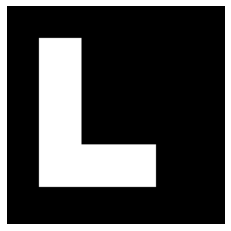

In [3]:
image = np.zeros((DIM, DIM))
image[300:1700, 300:700] = 1
image[1300:1700, 700:1400] = 1
plt.imshow(image, cmap='gray')
plt.axis('off')

In [4]:
def on_board(grid, row, col):
    return 0 <= row < grid.shape[0] and 0 <= col < grid.shape[1]

#### Funkcja przekształcająca obraz za pomocą kontrakcji

In [5]:
def transform(transform_params, image):
    a,b,c,d,e,f = transform_params
    transformed_image = np.zeros((image.shape[0],image.shape[1]))
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y,x] == 1:
                transformed_image[int(a*x + b*y + e), int(c*x + d*y + f)] = 1
    return transformed_image

#### Przykładowe konfiguracje odwzorowań afinicznych

In [6]:
param_values1 = [
    (0.000, -0.500, 0.500, 0.000, 0.500, 0.000),
    (0.000, 0.500, -0.500, 0.000, 0.500, 0.500),
    (0.500, 0.000, 0.000, 0.500, 0.250, 0.500)
    ]

param_values2 = [
    (0.849, 0.037, -0.037, 0.849, 0.075, 0.1830),
    (0.197, -0.226, 0.226, 0.197, 0.400, 0.049),
    (-0.150, 0.283, 0.260, 0.237, 0.575, -0.084),
    (0.000, 0.000, 0.000, 0.160, 0.500, 0.000)
    ]

#### Przekształcenie obrazu wejściowego za pomocą przykładowej kontrakcji

(-0.5, 2047.5, 2047.5, -0.5)

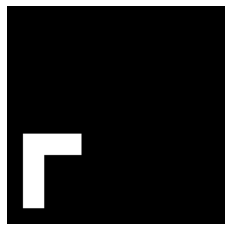

In [7]:
transformed_image = transform(param_values1[0], image)
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')

#### Funkcja pozwalająca na kompozycję wielu kontrakcji w postaci operatora Hutchinsona

In [8]:
def subtransform(transform_params, image):
    subtransformed_image = np.zeros((image.shape[0],image.shape[1]))
    for params in transform_params:
        transformed_image = transform(params, image)
        subtransformed_image += transformed_image
        np.place(subtransformed_image, subtransformed_image > 1, 1)
    return subtransformed_image

#### Wynik działania operatora Hutchinsona złożonego z odwzorowań afinicznych w param_values1

(-0.5, 2047.5, 2047.5, -0.5)

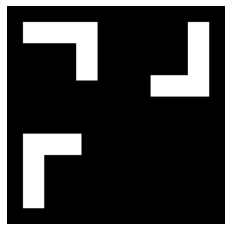

In [9]:
subtransformed_image1 = subtransform(param_values1, image)
plt.imshow(subtransformed_image1, cmap='gray')
plt.axis('off')

#### Wynik działania operatora Hutchinsona złożonego z odwzorowań afinicznych w param_values2

(-0.5, 2047.5, 2047.5, -0.5)

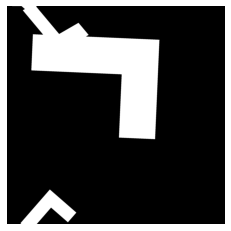

In [10]:
subtransformed_image2 = subtransform(param_values2, image)
plt.imshow(subtransformed_image2, cmap='gray')
plt.axis('off')

#### Funkcja pozwalająca na wykonanie zadanej liczby iteracji danego operatora Hutchinsona

In [11]:
def iterated_subtransform(n_iter, params, image):
    for _ in range(n_iter):
        image = subtransform(params, image)
    return image

#### Wynik działania operatora Hutchinsona złożonego z odwzorowań afinicznych w param_values1 dla 20 iteracji

(-0.5, 2047.5, 2047.5, -0.5)

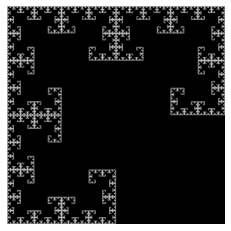

In [29]:
iterated_subtransformed_image1 = iterated_subtransform(20, param_values1, image)
plt.imshow(iterated_subtransformed_image1, cmap='gray')
plt.axis('off')

#### Wynik działania operatora Hutchinsona złożonego z odwzorowań afinicznych w param_values2 dla 25 iteracji

(-0.5, 2047.5, 2047.5, -0.5)

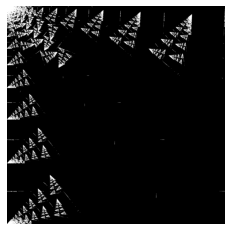

In [13]:
iterated_subtransformed_image2 = iterated_subtransform(25, param_values2, image)
plt.imshow(iterated_subtransformed_image2, cmap='gray')
plt.axis('off')

#### Propozycja własnych konfiguracji IFS

In [30]:
param_values3 = [
    (0.100, 0.500, -0.500, 0.100, 0.500, 0.500),
    (0.500, 0.100, 0.100, 0.500, 0.250, 0.500),
    (-0.500, 0.100, 0.100, -0.500, 0.250, 0.500)
    ]

param_values4 = [
    (0.100, -0.500, 0.500, 0.100, 0.500, 0.000),
    (0.100, 0.500, -0.500, 0.100, 0.500, 0.500),
    (-0.500, 0.100, 0.100, -0.500, 0.250, 0.500)
    ]

param_values5 = [
    (0.100, -0.700, 0.300, 0.100, 0.500, 0.000),
    (0.100, 0.300, -0.700, 0.100, 0.500, 0.500),
    (0.700, 0.100, 0.100, 0.300, 0.500, 0.500),
    (-0.300, 0.100, 0.100, -0.700, 0.500, 0.500)
    ]

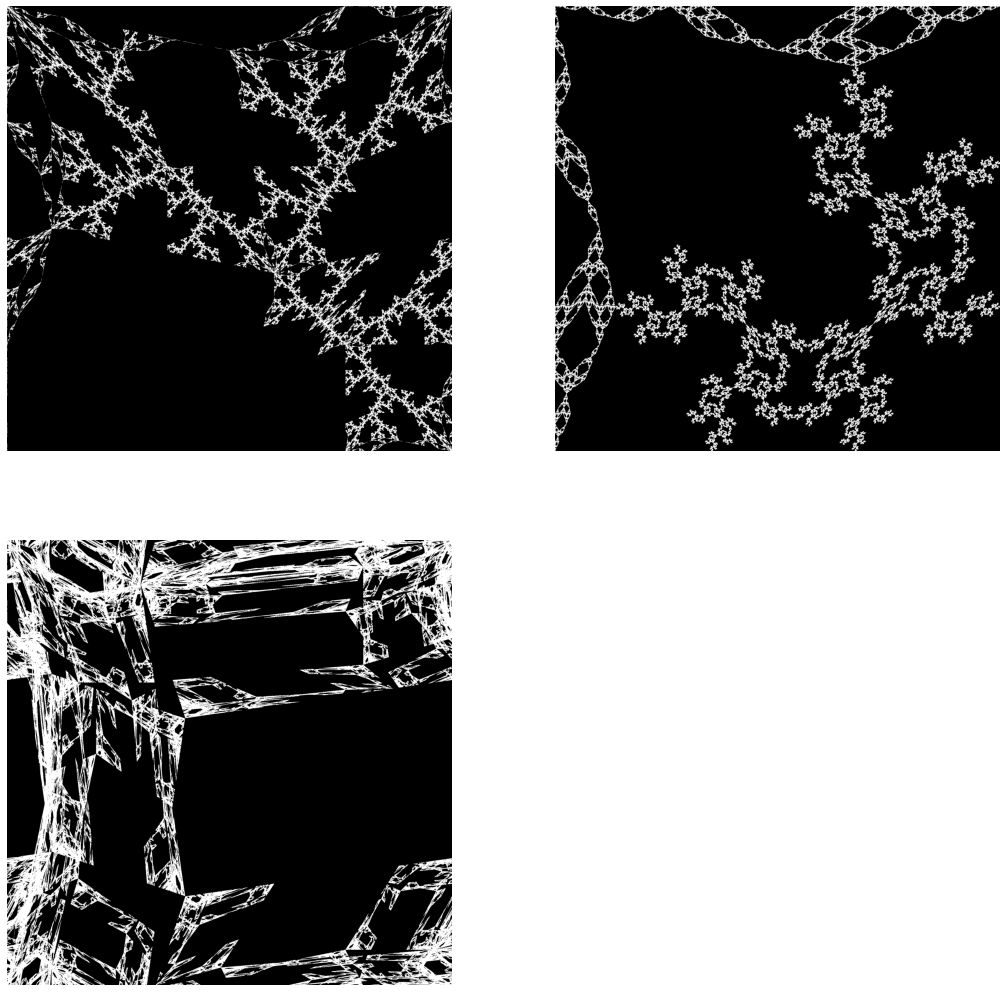

In [31]:
plt.figure(figsize=(18,18))
for i, params in enumerate([param_values3, param_values4, param_values5]):
    iterated_subtransformed_image = iterated_subtransform(20, params, image)
    plt.subplot(2,2,i+1)
    plt.imshow(iterated_subtransformed_image, cmap='gray')
    plt.axis('off')

## Zadanie 2* Kopiarka wielokrotnie redukująca z ruletką

#### Generacja obrazu zawierającego ok. 100000 punktów

In [63]:
array = np.random.choice(2, DIM**2, p=[(DIM**2-100000)/(DIM**2), 100000/(DIM**2)])
unique, counts = np.unique(array, return_counts=True)
n_values = {value: count for value, count in zip(unique, counts)}
n_values

{0: 4094223, 1: 100081}

(-0.5, 2047.5, 2047.5, -0.5)

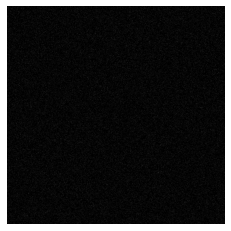

In [64]:
pointed_image = array.reshape(DIM, DIM)
plt.imshow(pointed_image, cmap='gray')
plt.axis('off')

#### Wynik działania operatora Hutchinsona złożonego z odwzorowań afinicznych w param_values3 dla obrazu z pojedyńczymi punktami 

(-0.5, 2047.5, 2047.5, -0.5)

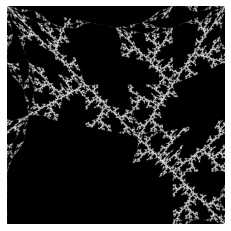

In [34]:
iterated_subtransformed_image = iterated_subtransform(15, param_values3, pointed_image)
plt.imshow(iterated_subtransformed_image, cmap='gray')
plt.axis('off')

Otrzymujemy atraktor o bardzo podobnym kształcie do tego z zadania 1, gdzie obrazem wejściowym była figura o kształcie litery L.

#### Funkcje umożliwiające wybranie w każdej iteracji jednej z podanych transformacji (z równym lub różnym prawdopodobieństwem) i zastosowanie jej do wszystkich punktów obrazu

In [38]:
def random_transform(transform_params, image, is_equal_proba, probabilities):
    if is_equal_proba:
        params = random.sample(transform_params, 1)
    else:
        params = random.choices(transform_params, probabilities)
    a,b,c,d,e,f = params[0]
    transformed_image = np.zeros((image.shape[0],image.shape[1]))
    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            if image[y,x] == 1:
                transformed_image[int(a*x + b*y + e), int(c*x + d*y + f)] = 1
    return transformed_image

In [39]:
def iterated_random_transform(n_iter, params, image, is_equal_proba = True, probabilities = None):
    for _ in range(n_iter):
        transformed_image = random_transform(params, image, is_equal_proba, probabilities)
        image += transformed_image.astype('int32')
        np.place(image, image > 1, 1)
    return image

#### Wynik działania systemu dla zdefiniowanych wcześniej konfiguracji odwzorowań afinicznych, gdzie wystąpienie każdej z transformacji ma takie samo prawdopodobieństwo

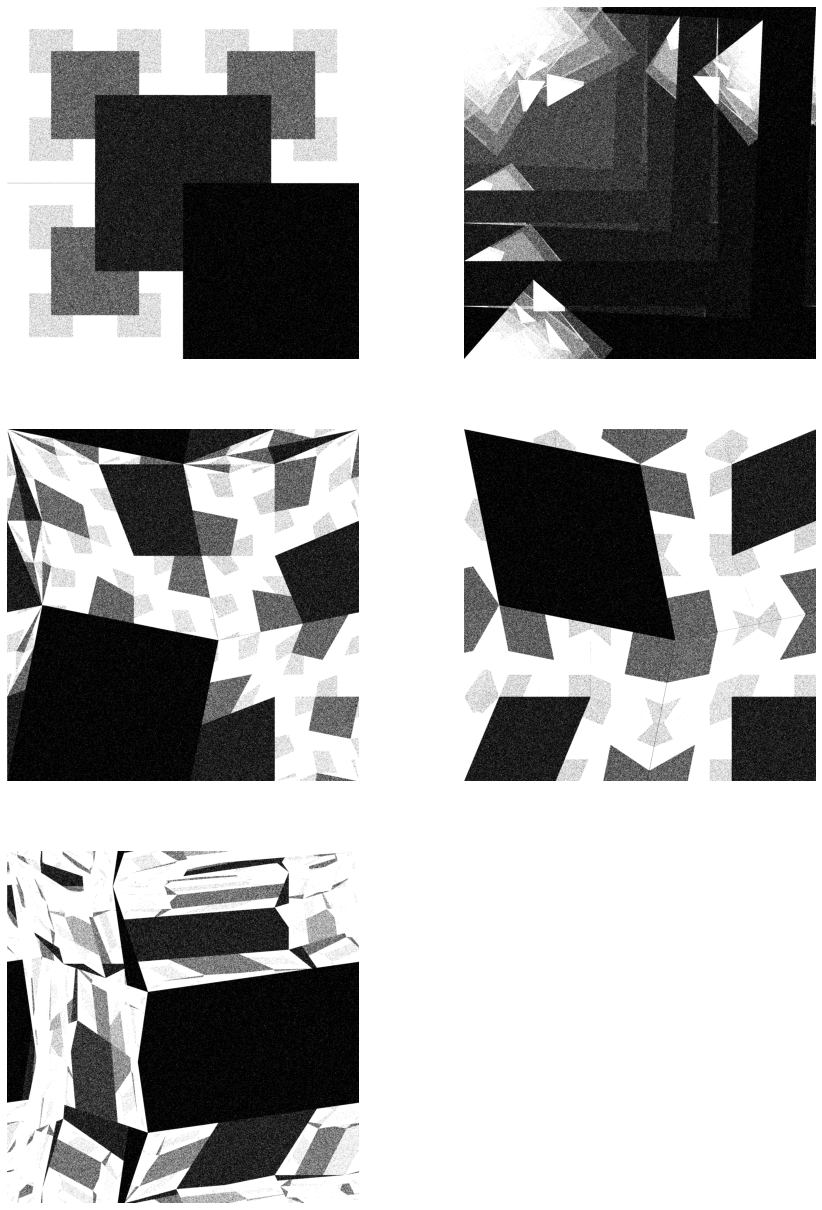

In [35]:
plt.figure(figsize=(15,22))
for i, params in enumerate([param_values1, param_values2, param_values3, param_values4, param_values5]):
    array = np.random.choice(2, DIM**2, p=[(DIM**2-100000)/(DIM**2), 100000/(DIM**2)])
    pointed_image = array.reshape(DIM, DIM)
    transformed_image = iterated_random_transform(25, params, pointed_image)
    plt.subplot(3,2,i+1)
    plt.imshow(transformed_image, cmap='gray')
    plt.axis('off')

#### Wynik działania systemu dla konfiguracji odwzorowań afinicznych w param_values3, gdzie wystąpienie danej transformacji ma różne prawdopodobieństwo

In [41]:
probabilities = [
    [0.1, 0.1, 0.8],
    [0.1, 0.8, 0.1],
    [0.8, 0.1, 0.1]
]

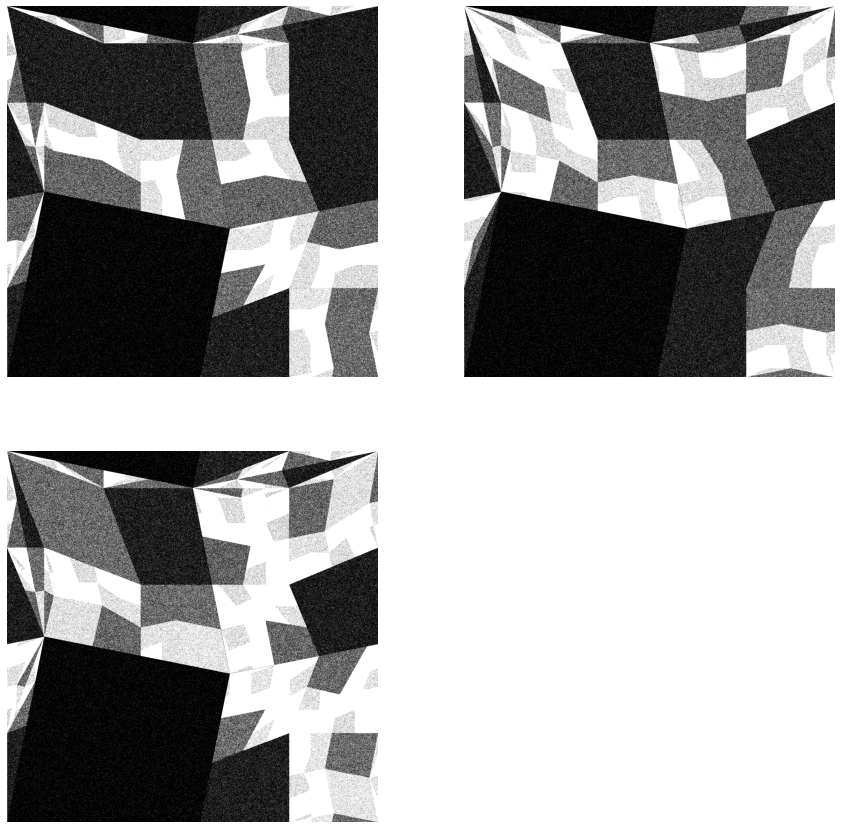

In [42]:
plt.figure(figsize=(15,15))
for i, proba in enumerate(probabilities):
    array = np.random.choice(2, DIM**2, p=[(DIM**2-100000)/(DIM**2), 100000/(DIM**2)])
    pointed_image = array.reshape(DIM, DIM)
    transformed_image = iterated_random_transform(25, param_values3, pointed_image, is_equal_proba=False, probabilities=proba)
    plt.subplot(2,2,i+1)
    plt.imshow(transformed_image, cmap='gray')
    plt.axis('off')

Atraktory różnią się od siebie, gdy prawdopodoieństwo zastosowanych transformacji jest różne. 
Na podstawie otrzymanych wyników, można zauważyć, że ostatni atraktor składa się z nawiększej ilości różnorodnych fragmentów. Do jego utworzenia w największym stopniu przyczyniła się pierwsza transformacja (80% prawdopodobieństwo). Stąd można wnioskować, że to ona pozwala wygenerować najbardziej różnorodny atraktor.